In [1]:
print(" Welcome to the chemical descriptor analysis script. Be careful not to break everything")

 Welcome to the chemical descriptor analysis script. Be careful not to break everything


In [2]:
from rdkit import *
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import MolFromSmiles
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit import rdBase
from rdkit import ML
import numpy as np
import pandas as pd

print(rdBase.rdkitVersion)




2021.09.2


In [3]:
# molGlucIso = Chem.MolFromSmiles("OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O") #Glucose  Isomeric Smiles
# molGlucCan = Chem.MolFromSmiles("C(C1C(C(C(C(O1)O)O)O)O)O") # Glucose canonical smiles

# smiles_list = ['OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O', "CC(=O)[O-]","O=P(O)(O)OP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n2cnc1c(ncnc12)N)[C@H](O)[C@@H]3O", "S"]


molInchi = Chem.MolFromInchi("InChI=1S/C6H12O6/c7-1-2-3(8)4(9)5(10)6(11)12-2/h2-11H,1H2/t2-,3-,4+,5-,6?/m1/s1") # Glucose

# smiles = Chem.MolToSmiles(molInchi)


df = pd.read_csv("MetabolitesFromInChIKey.csv")


DRAWING MOLECULES

In [ ]:
# molGlucCan

In [55]:
# smiles = Chem.MolToSmiles(molInchi)

EXTRACTING CHEMICAL DESCRIPTORS


In [6]:
mw = Descriptors.MolWt(molInchi)


MolLog = Descriptors.MolLogP(molInchi)

In [5]:
print(f"The molecular weight is: {mw}")
print(f"The MolLog of the molecule is: {MolLog}")


The molecular weight is: 180.15599999999998
The MolLog of the molecule is: -3.2213999999999987


In [ ]:
mol_list = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)



In [ ]:
img = Draw.MolsToGridImage(mol_list, molsPerRow = 2, useSVG = True)

#Calls img
img

List of Metabolites in the central TCA cycle

In [11]:
TCA_smile_list = [
"OC(=O)CC(O)(C(=O)O)CC(=O)O",
"C(C(=CC(=O)O)C(=O)O)C(=O)O","C(C(C(C(=O)O)O)C(=O)O)C(=O)O", 
"O=C(O)C(=O)CCC(=O)O",
"O=C(O)CCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n2cnc1c(ncnc12)N)[C@H](O)[C@@H]3OP(=O)(O)O",
"C(CC(=O)O)C(=O)O", 
"C(=C/C(=O)O)\C(=O)O", 
"O=C(O)CC(O)C(=O)O", 
"O=C(O)C(=O)CC(=O)O"]

In [12]:
TCA_draw = []
for smiles in TCA_smile_list:
    mol = Chem.MolFromSmiles(smiles)
    TCA_draw.append(mol)


In [13]:
imgTCA = Draw.MolsToGridImage(TCA_draw, molsPerRow = 3, useSVG = True)

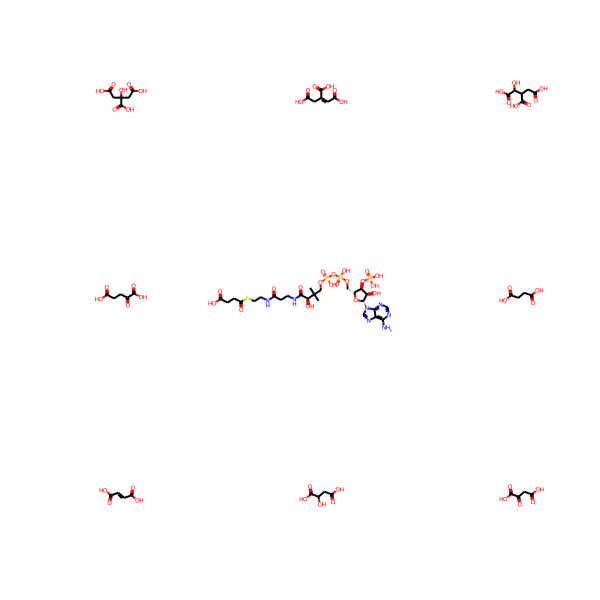

In [14]:
imgTCA

In [10]:
#pattern = Chem.MolFromSmiles("S")
#pattern = Chem.MolFromSmiles("C(=O)O")
#pattern = Chem.MolFromSmiles("CC(N)C")

pattern = Chem.MolFromSmarts("[r5]")

for mol in TCA_draw:
    print(mol.HasSubstructMatch(pattern))

NameError: name 'TCA_draw' is not defined

FINGERPRINTING


In [ ]:
glucose = mol_list[0]

In [ ]:
glucose

In [ ]:
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(glucose,2, nBits = 1024, bitInfo = bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
fp_arr


In [ ]:
np.nonzero(fp_arr)

In [ ]:
bi

In [31]:
prints = [(glucose, x, bi) for x in fp.GetOnBits()]

NameError: name 'fp' is not defined

In [33]:
Descriptors.MolLogP(molInchi)

-3.2213999999999987